In [191]:
! pip install seaborn

In [192]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [193]:
data = pd.read_csv("./heart.csv")
data = pd.DataFrame(data)


In [194]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [195]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## Análise Geral da Base 

In [196]:
# Função para conceder informações sobre o DataFrame 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [197]:
#Outro jeito de saber se há valores nulos no dataset
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [198]:
 #Verificando a frequencia dos targets 
data['target'].value_counts()

# Verificando a contagem ordenada de idades maior do que 40
# data[data['age'] > 40].age.sort_values().value_counts(sort=False)

target
1    526
0    499
Name: count, dtype: int64

In [199]:
# Verificando a presença de linhas com dados iguais no dataset
data.sort_values(by='age')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
143,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
99,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
387,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


In [200]:
# Identificando quantas linhas duplicadas existem no DataFrame
data.duplicated().value_counts()

True     723
False    302
Name: count, dtype: int64

In [201]:
# Identificando quais linhas são duplicatas
data[data.duplicated()].sort_values(by='age')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
535,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
965,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
387,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


## Exploração Estatística de Atributos Selecionados

In [202]:
# Atributos escolhidos para análise
data[['age', 'trestbps', 'chol', 'oldpeak']].sort_values(by='age')



,age,trestbps,chol,oldpeak
64,29,130,204,0.0
60,29,130,204,0.0
118,29,130,204,0.0
668,29,130,204,0.0
143,34,118,182,0.0
...,...,...,...,...
535,76,140,197,1.1
99,76,140,197,1.1
162,77,125,304,0.0
387,77,125,304,0.0


In [203]:
data[['age', 'trestbps', 'chol', 'oldpeak']].describe()

,age,trestbps,chol,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000
mean,54.434146,131.611707,246.00000,1.071512
std,9.072290,17.516718,51.59251,1.175053
min,29.000000,94.000000,126.00000,0.000000
25%,48.000000,120.000000,211.00000,0.000000
50%,56.000000,130.000000,240.00000,0.800000
75%,61.000000,140.000000,275.00000,1.800000
max,77.000000,200.000000,564.00000,6.200000


#### Idade

In [204]:
# Média
age_mean = data['age'].mean()

# Moda 
age_mode = data['age'].mode()

# Mediana 
age_median = data['age'].median()

# Percentis 20, 50, 70
age_quantiles_20_50_70 = data['age'].quantile([0.2, 0.5, 0.7])

# Quartis Q1, Q2, Q3
age_quantiles = data['age'].quantile([0.25, 0.5, 0.75])

# Variancia
age_varr = data['age'].var()

# Desvio Padrão
age_std = data['age'].std()

print("Estatísticas sobre Idade)")
print(f"- Média: {age_mean}")
print(f"- Moda: {age_mode.iloc[0]}")
print(f"- Median: {age_median}")
print(f"- Percentis 20, 50, 70: {age_quantiles_20_50_70.tolist()}")
print(f"- Quartis Q1, Q2, Q3: {age_quantiles.tolist()}")
print(f"- Variancia: {age_varr}")
print(f"- Desvio Padrao: {age_std}")

Estatísticas sobre Idade)
- Média: 54.43414634146342
- Moda: 58
- Median: 56.0
- Percentis 20, 50, 70: [45.0, 56.0, 60.0]
- Quartis Q1, Q2, Q3: [48.0, 56.0, 61.0]
- Variancia: 82.3064500762195
- Desvio Padrao: 9.072290233244278


#### Pressão Arterial em Repouso

In [205]:
# Média
trestbps_mean = data['trestbps'].mean()

# Moda 
trestbps_mode = data['trestbps'].mode()

# Mediana 
trestbps_median = data['trestbps'].median()

# Percentis 20, 50, 70
trestbps_quantiles_20_50_70 = data['trestbps'].quantile([0.2, 0.5, 0.7])

# Quartis Q1, Q2, Q3
trestbps_quantiles = data['trestbps'].quantile([0.25, 0.5, 0.75])

# Variancia
trestbps_varr = data['trestbps'].var()

# Desvio Padrão
trestbps_std = data['trestbps'].std()

print("Estatísticas sobre Pressão em Repouso)")
print(f"- Média: {trestbps_mean}")
print(f"- Moda: {trestbps_mode.iloc[0]}")
print(f"- Median: {trestbps_median}")
print(f"- Percentis 20, 50, 70: {trestbps_quantiles_20_50_70.tolist()}")
print(f"- Quartis Q1, Q2, Q3: {trestbps_quantiles.tolist()}")
print(f"- Variancia: {trestbps_varr}")
print(f"- Desvio Padrao: {trestbps_std}")

Estatísticas sobre Pressão em Repouso)
- Média: 131.61170731707318
- Moda: 120
- Median: 130.0
- Percentis 20, 50, 70: [120.0, 130.0, 140.0]
- Quartis Q1, Q2, Q3: [120.0, 130.0, 140.0]
- Variancia: 306.835409679878
- Desvio Padrao: 17.516718005376408


#### Colesterol Total em mg/dl

In [206]:
# Média
chol_mean = data['chol'].mean()

# Moda 
chol_mode = data['chol'].mode()

# Mediana 
chol_median = data['chol'].median()

# Percentis 20, 50, 70
chol_quantiles_20_50_70 = data['chol'].quantile([0.2, 0.5, 0.7])

# Quartis Q1, Q2, Q3
chol_quantiles = data['chol'].quantile([0.25, 0.5, 0.75])

# Variancia
chol_varr = data['chol'].var()

# Desvio Padrão
chol_std = data['chol'].std()

print("Estatísticas sobre Colesterol Total)")
print(f"- Média: {chol_mean}")
print(f"- Moda: {chol_mode.iloc[0]}")
print(f"- Median: {chol_median}")
print(f"- Percentis 20, 50, 70: {chol_quantiles_20_50_70.tolist()}")
print(f"- Quartis Q1, Q2, Q3: {chol_quantiles.tolist()}")
print(f"- Variancia: {chol_varr}")
print(f"- Desvio Padrao: {chol_std}")

Estatísticas sobre Colesterol Total)
- Média: 246.0
- Moda: 204
- Median: 240.0
- Percentis 20, 50, 70: [204.0, 240.0, 268.0]
- Quartis Q1, Q2, Q3: [211.0, 240.0, 275.0]
- Variancia: 2661.787109375
- Desvio Padrao: 51.59251020618206


#### Oldpeak

In [207]:
# Média
oldpeak_mean = data['oldpeak'].mean()

# Moda 
oldpeak_mode = data['oldpeak'].mode()

# Mediana 
oldpeak_median = data['oldpeak'].median()

# Percentis 20, 50, 70
oldpeak_quantiles_20_50_70 = data['oldpeak'].quantile([0.2, 0.5, 0.7])

# Quartis Q1, Q2, Q3
oldpeak_quantiles = data['oldpeak'].quantile([0.25, 0.5, 0.75])

# Variancia
oldpeak_varr = data['oldpeak'].var()

# Desvio Padrão
oldpeak_std = data['oldpeak'].std()

print("Estatísticas sobre Oldpeak)")
print(f"- Média: {oldpeak_mean}")
print(f"- Moda: {oldpeak_mode.iloc[0]}")
print(f"- Median: {oldpeak_median}")
print(f"- Percentis 20, 50, 70: {oldpeak_quantiles_20_50_70.tolist()}")
print(f"- Quartis Q1, Q2, Q3: {oldpeak_quantiles.tolist()}")
print(f"- Variancia: {oldpeak_varr}")
print(f"- Desvio Padrao: {oldpeak_std}")

Estatísticas sobre Oldpeak)
- Média: 1.0715121951219515
- Moda: 0.0
- Median: 0.8
- Percentis 20, 50, 70: [0.0, 0.8, 1.5]
- Quartis Q1, Q2, Q3: [0.0, 0.8, 1.8]
- Variancia: 1.3807501524390244
- Desvio Padrao: 1.175053255150176


### Visualização e Detecção de Outliers

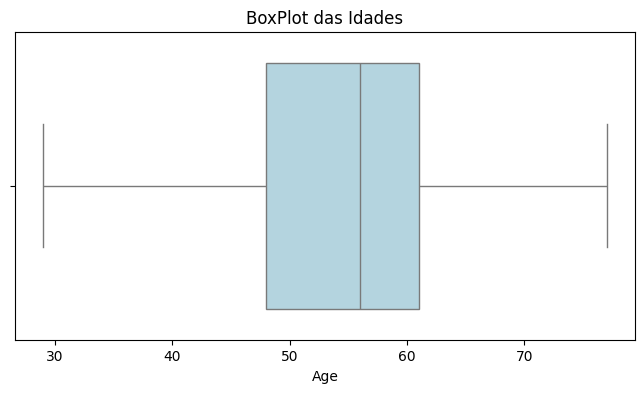

In [208]:
# Idade (Age)
plt.figure(figsize=(8,4))
sns.boxplot(x=data["age"], color="lightblue")

plt.title("BoxPlot das Idades")
plt.xlabel("Age")
plt.show()

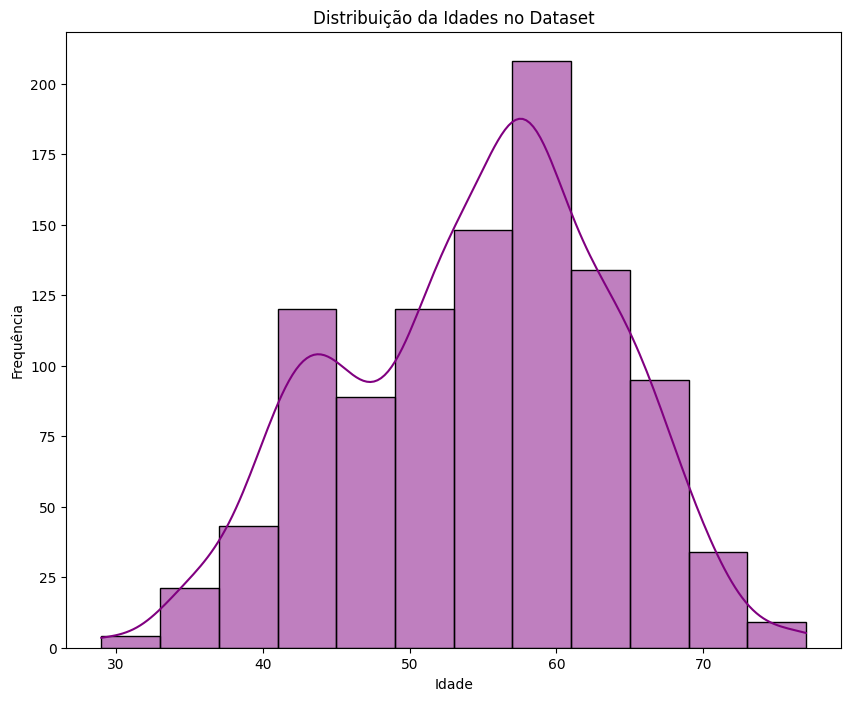

In [209]:
# Idade (age)
plt.figure(figsize=(10, 8))
sns.histplot(data['age'], color="purple", bins=12, kde=True)

plt.title("Distribuição da Idades no Dataset")
plt.xlabel("Idade")
plt.ylabel("Frequência")

plt.show()

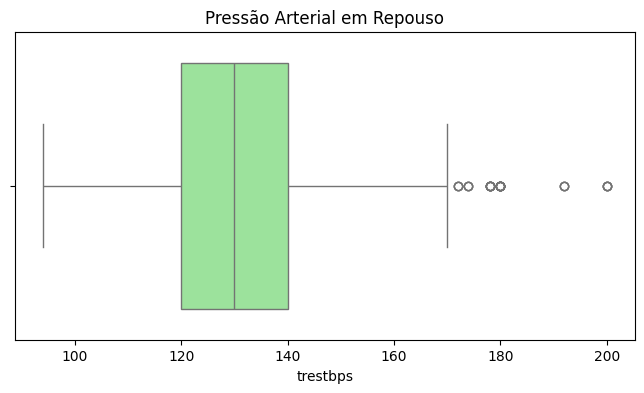

In [210]:
# Pressão Arterial em Repouso (trestbps)
plt.figure(figsize=(8,4))
sns.boxplot(x=data["trestbps"], color="lightgreen")

plt.title("Pressão Arterial em Repouso")
plt.xlabel("trestbps")
plt.show()

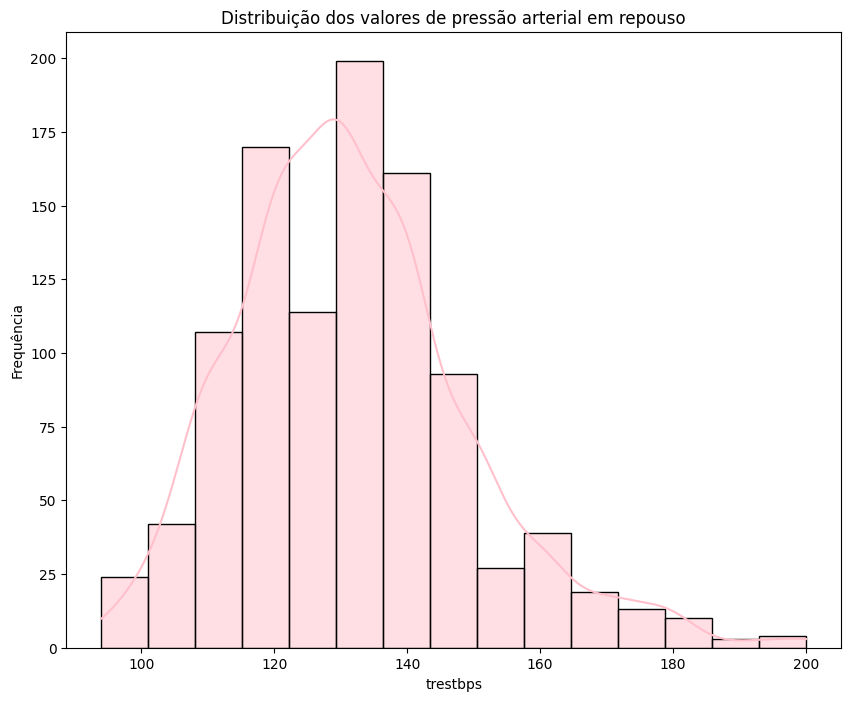

In [211]:
# Pressão Arterial em Repouso (trestbps)
plt.figure(figsize=(10, 8))
sns.histplot(data['trestbps'], color="pink", bins=15, kde=True)

plt.title("Distribuição dos valores de pressão arterial em repouso")
plt.xlabel("trestbps")
plt.ylabel("Frequência")

plt.show()

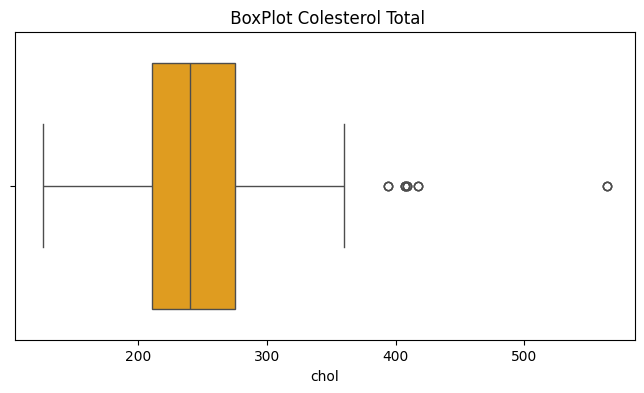

In [212]:
# Colesterol Total em mg/dl (chol)
plt.figure(figsize=(8,4))
sns.boxplot(x=data["chol"], color="orange")

plt.title(" BoxPlot Colesterol Total")
plt.xlabel("chol")
plt.show()

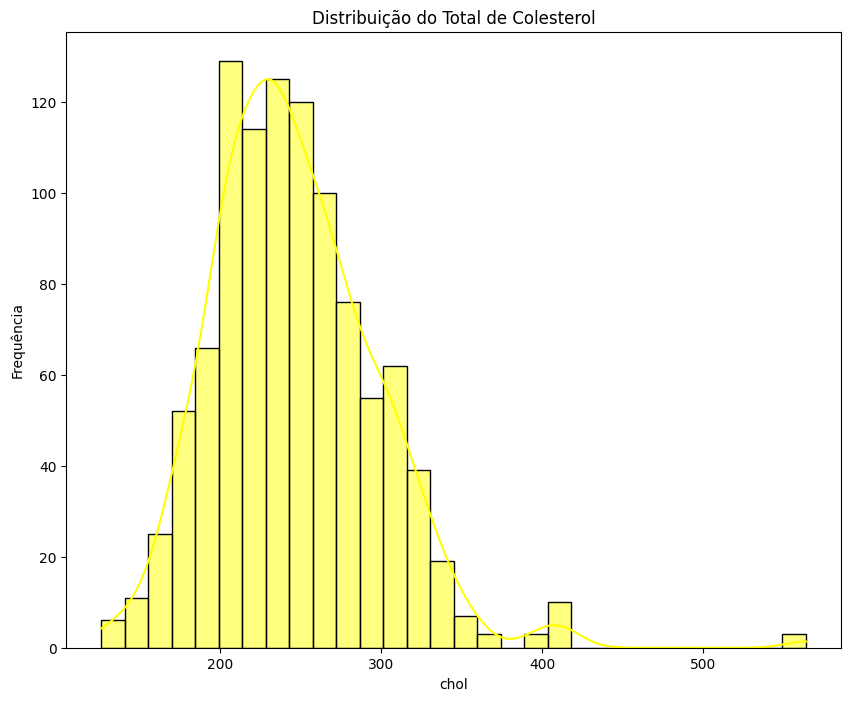

In [213]:
# Colesterol Total em mg/dl (chol)
plt.figure(figsize=(10, 8))
sns.histplot(data['chol'], color="yellow", bins=30, kde=True)

plt.title("Distribuição do Total de Colesterol")
plt.xlabel("chol")
plt.ylabel("Frequência")

plt.show()

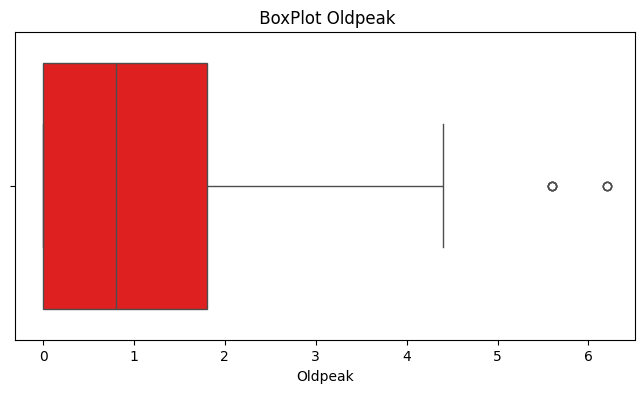

In [214]:
# Oldpeak (oldpeak)
plt.figure(figsize=(8,4))
sns.boxplot(x=data["oldpeak"], color="red")

plt.title(" BoxPlot Oldpeak")
plt.xlabel("Oldpeak")
plt.show()

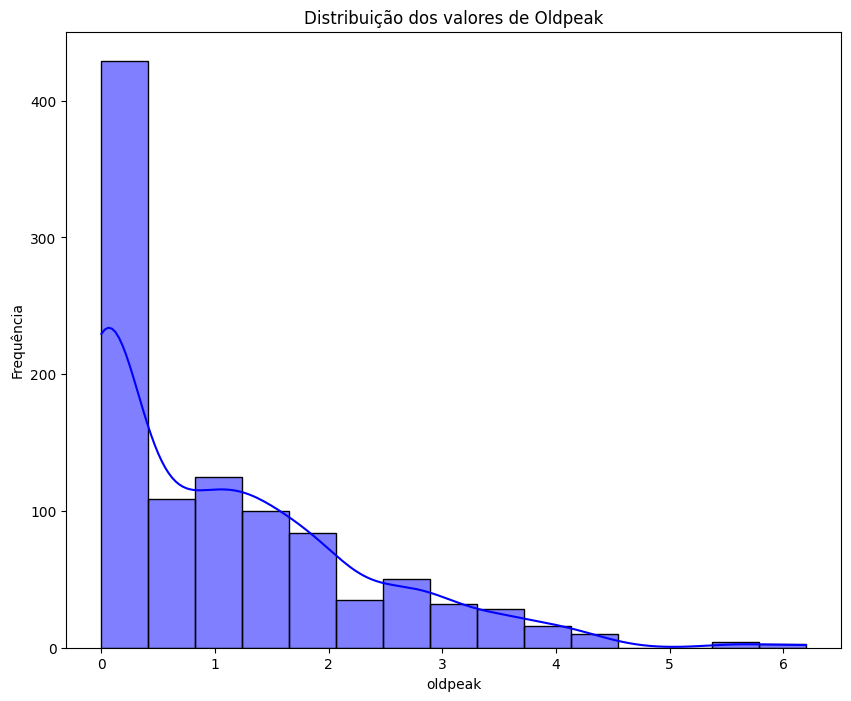

In [215]:
# Oldpeak (oldpeak)
plt.figure(figsize=(10, 8))
sns.histplot(data['oldpeak'], color="blue", bins=15, kde=True)

plt.title("Distribuição dos valores de Oldpeak")
plt.xlabel("oldpeak")
plt.ylabel("Frequência")

plt.show()

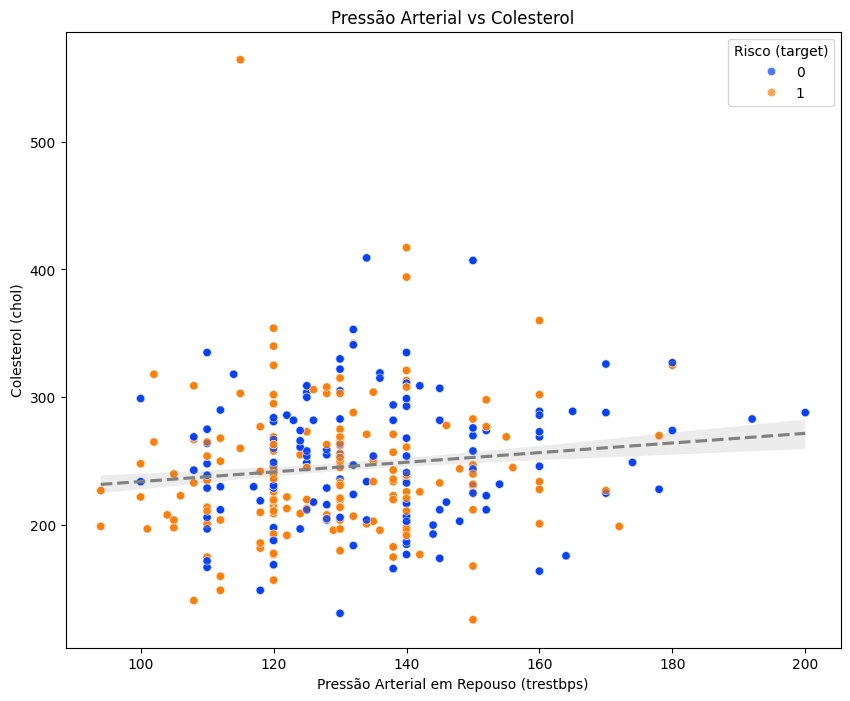

In [218]:
# Relacionando Pressão Arterial em Repouso com o Colesterol Total 
# Verificando como essa combinação se comporta para um possivel diagnóstico

plt.figure(figsize=(10, 8))

scatter = sns.scatterplot(
    data= data,
    x="trestbps",        # Pressão arterial em repouso
    y="chol",            # Colesterol
    hue="target",        # Cor por risco
    palette="bright",    # Paleta de cores
    alpha=0.7,
)

# Adicionando regressão linear
sns.regplot(
    data=data,
    x="trestbps",
    y="chol",
    scatter=False,
    ax=scatter,
    color="gray",
    line_kws={"linestyle": "dashed"}
)

plt.title("Pressão Arterial vs Colesterol")
plt.xlabel("Pressão Arterial em Repouso (trestbps)")
plt.ylabel("Colesterol (chol)")
plt.legend(title="Risco (target)")

plt.show()

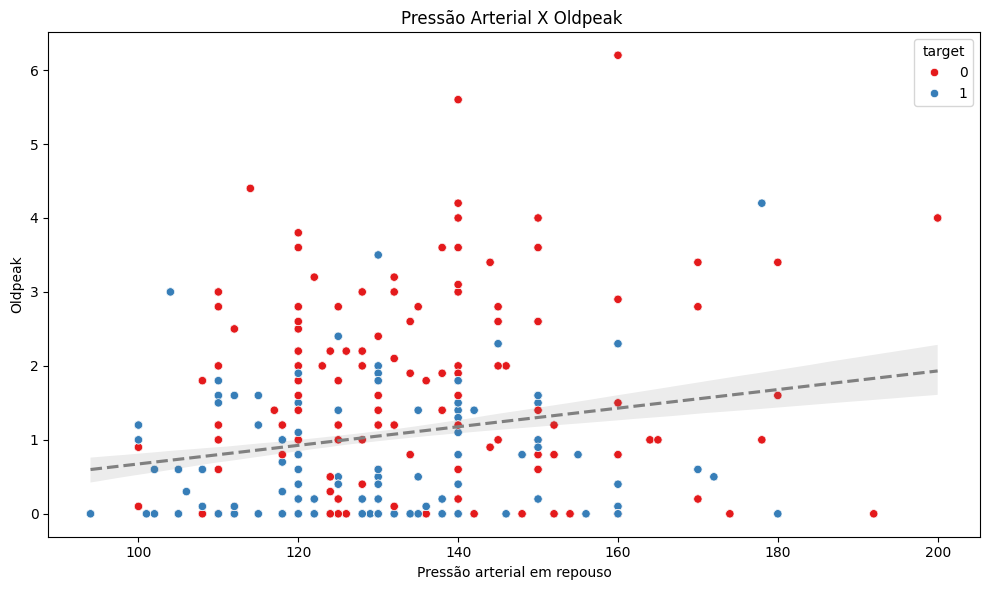

In [223]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data = data,
    x="trestbps",       
    y="oldpeak",            
    hue="target",        
    palette="Set1",   
)

sns.regplot(
    data=data,
    x="trestbps",
    y="oldpeak",
    scatter=False,
    ax=scatter,
    color="gray",
    line_kws={"linestyle": "dashed"}
)

plt.title("Pressão Arterial X Oldpeak ")
plt.xlabel("Pressão arterial em repouso")
plt.ylabel("Oldpeak")
plt.tight_layout()
plt.show()

####  Análise de Redundância e Correlação

In [ ]:
# Analisando a covariancia entre os dados 
data.cov()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.306450,-0.431198,-0.672251,43.085733,102.890625,0.392164,-0.635490,-81.446089,0.378144,2.218825,-0.947742,2.539458,0.407093,-1.040392
sex,-0.431198,0.211944,-0.019491,-0.636863,-4.708984,0.004465,-0.013395,-0.522838,0.030288,0.045812,-0.007584,0.053021,0.056697,-0.064346
cp,-0.672251,-0.019491,1.060160,0.688565,-4.336914,0.029108,0.023687,7.268296,-0.195451,-0.211407,0.083727,-0.187017,-0.104385,0.223903
trestbps,43.085733,-0.636863,0.688565,306.835410,115.657227,1.135165,-1.144685,-15.822822,0.506798,3.857971,-1.303344,1.887842,0.644446,-1.215584
chol,102.890625,-4.708984,-4.336914,115.657227,2661.787109,0.495117,-4.014648,-25.841797,1.643555,3.933301,-0.454102,3.949219,3.209961,-2.579102
fbs,0.392164,0.004465,0.029108,1.135165,0.495117,0.127111,-0.019583,-0.072719,0.008303,0.004549,-0.013634,0.050406,-0.009333,-0.007339
restecg,-0.635490,-0.013395,0.023687,-1.144685,-4.014648,-0.019583,0.278655,0.587909,-0.016373,-0.031085,0.028073,-0.042482,-0.006718,0.035496
thalach,-81.446089,-0.522838,7.268296,-15.822822,-25.841797,-0.072719,0.587909,529.263325,-4.136114,-9.456022,5.618078,-4.929917,-1.400290,4.865194
exang,0.378144,0.030288,-0.195451,0.506798,1.643555,0.008303,-0.016373,-4.136114,0.223514,0.172684,-0.078077,0.052558,0.057865,-0.103558
oldpeak,2.218825,0.045812,-0.211407,3.857971,3.933301,0.004549,-0.031085,-9.456022,0.172684,1.380750,-0.417527,0.268673,0.147810,-0.257632


In [ ]:
# Analisando a Correlação entre os dados 
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441
